In [1]:
import numpy as np
import random
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import circlify
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from utils import *
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier




2023-07-01 14:50:45.910220: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 14:50:45.964462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 14:50:45.965170: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 14:50:46.888182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[nltk_data] Downloading package punkt to /home/santi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/santi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s

# NLP Project 1_1
## Authors: 
1) Santiago Rodrigo Patino - 486170<br>
2) Robert Karsten Strehlow - 371376<br>
3) Syed Ali Murad Tahir - 467775 <br>



## Data Analysis & Preprocessing

In [2]:
data, labels = extract_data('data/Sentences_50Agree.txt')

In [3]:
dataset = pd.DataFrame(np.column_stack([data, labels]), 
                               columns=['data', 'labels'])
dataset

,data,labels
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,negative
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4843,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4844,Net sales of the Paper segment decreased to EU...,negative


## Task2: Pre-processing

In [4]:
##Normalize & remove stopwords
filtered_data_no_num = remove_stopwords(normalize_corpus(data, remove_numbers=True))

In [5]:
i = 0
for index, sentence in enumerate(filtered_data_no_num):
    if index < 10:
        print(f"Sentence {i}: {sentence}")
        i += 1
    else:
        break

print(f"Number of sentences: {len(filtered_data_no_num)}")

Sentence 0: ['according', 'gran', 'company', 'plans', 'move', 'production', 'russia', 'although', 'company', 'growing']
Sentence 1: ['technopolis', 'plans', 'develop', 'stages', 'area', 'less', 'square', 'meters', 'order', 'host', 'companies', 'working', 'computer', 'technologies', 'telecommunications', 'statement', 'said']
Sentence 2: ['international', 'electronic', 'industry', 'company', 'elcoteq', 'laid', 'tens', 'employees', 'tallinn', 'facility', 'contrary', 'earlier', 'layoffs', 'company', 'contracted', 'ranks', 'office', 'workers', 'daily', 'postimees', 'reported']
Sentence 3: ['new', 'production', 'plant', 'company', 'would', 'increase', 'capacity', 'meet', 'expected', 'increase', 'demand', 'would', 'improve', 'use', 'raw', 'materials', 'therefore', 'increase', 'production', 'profitability']
Sentence 4: ['according', 'company', 'updated', 'strategy', 'years', '-', 'basware', 'targets', 'long-term', 'net', 'sales', 'growth', 'range', 'percent', '-', 'percent', 'operating', 'prof

## Task1: Extract insights from data 

In [6]:
positives, neutrals, negatives = get_data_splitted(filtered_data_no_num, labels)

Number of positive sentences:  1363   28.126289723483282 %
Number of neutral sentences:  2879   59.40982253404869 %
Number of negative sentences:  1967   40.5901774659513 %


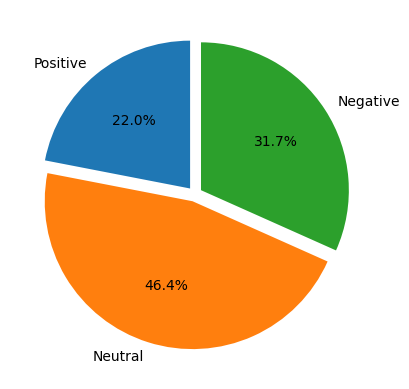

In [7]:
#Distribution of the dataset (Positive vs Neutral vs Negative)
print("Number of positive sentences: ", len(positives), " ", len(positives)/len(data)*100, "%")
print("Number of neutral sentences: ", len(neutrals), " ", len(neutrals)/len(data)*100, "%")
print("Number of negative sentences: ", len(negatives), " ", len(negatives)/len(data)*100, "%")

#Pie Chart of the dataset (Positive vs Neutral vs Negative)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [len(positives), len(neutrals), len(negatives)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()


Average number of words and characters per class: 
Positive Sentences - Avg Number of Words:  13.107850330154072  - Avg Number of Characters :  6.43227359229822
Neutral Sentences - Avg Number of Words:  11.804793331017715  - Avg Number of Characters:  6.690519625728241
Negative Sentences - Avg Number of Words:  12.820030503304524  - Avg Number of Characters:  6.320537732482056 



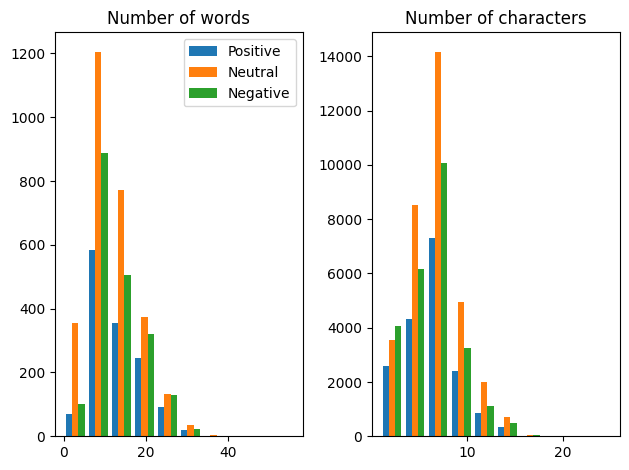

In [8]:
#Average number of words and number of characters per class
n_words_pos = [len(sentence) for sentence in positives]
avg_n_words_pos = sum(n_words_pos)/len(n_words_pos)
n_chars_pos = [len(word) for sentence in positives for word in sentence]
avg_n_chars_pos = sum(n_chars_pos)/len(n_chars_pos)

n_words_neu = [len(sentence) for sentence in neutrals]
avg_n_words_neu = sum(n_words_neu)/len(n_words_neu)
n_chars_neu = [len(word) for sentence in neutrals for word in sentence]
avg_n_chars_neu = sum(n_chars_neu)/len(n_chars_neu)

n_words_neg = [len(sentence) for sentence in negatives]
avg_n_words_neg = sum(n_words_neg)/len(n_words_neg)
n_chars_neg = [len(word) for sentence in negatives for word in sentence]
avg_n_chars_neg = sum(n_chars_neg)/len(n_chars_neg)

print("Average number of words and characters per class: ")
print("Positive Sentences - Avg Number of Words: ", avg_n_words_pos, " - Avg Number of Characters : ", avg_n_chars_pos)
print("Neutral Sentences - Avg Number of Words: ", avg_n_words_neu, " - Avg Number of Characters: ", avg_n_chars_neu)
print("Negative Sentences - Avg Number of Words: ", avg_n_words_neg, " - Avg Number of Characters: ", avg_n_chars_neg, "\n")

#Graph of the average number of words and number of characters per class

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist([n_words_pos, n_words_neu, n_words_neg], bins=10, label=['Positive', 'Neutral', 'Negative'])
axs[0].set_title('Number of words')
axs[1].hist([n_chars_pos, n_chars_neu, n_chars_neg], bins=10, label=['Positive', 'Neutral', 'Negative'])
axs[1].set_title('Number of characters')
axs[0].legend()
plt.show()






- Positive sentences have, on average, 24.79 words and 5.14 characters. This suggests that positive sentences tend to be relatively longer in terms of word count compared to the other classes.
- Neutral sentences have, on average, 21.57 words and 5.24 characters. These sentences are shorter compared to positive sentences but have a slightly higher average number of characters.
- Negative sentences have, on average, 25.03 words and 5.09 characters. Similar to positive sentences, negative sentences tend to be longer in terms of word count, while having slightly fewer characters on average.

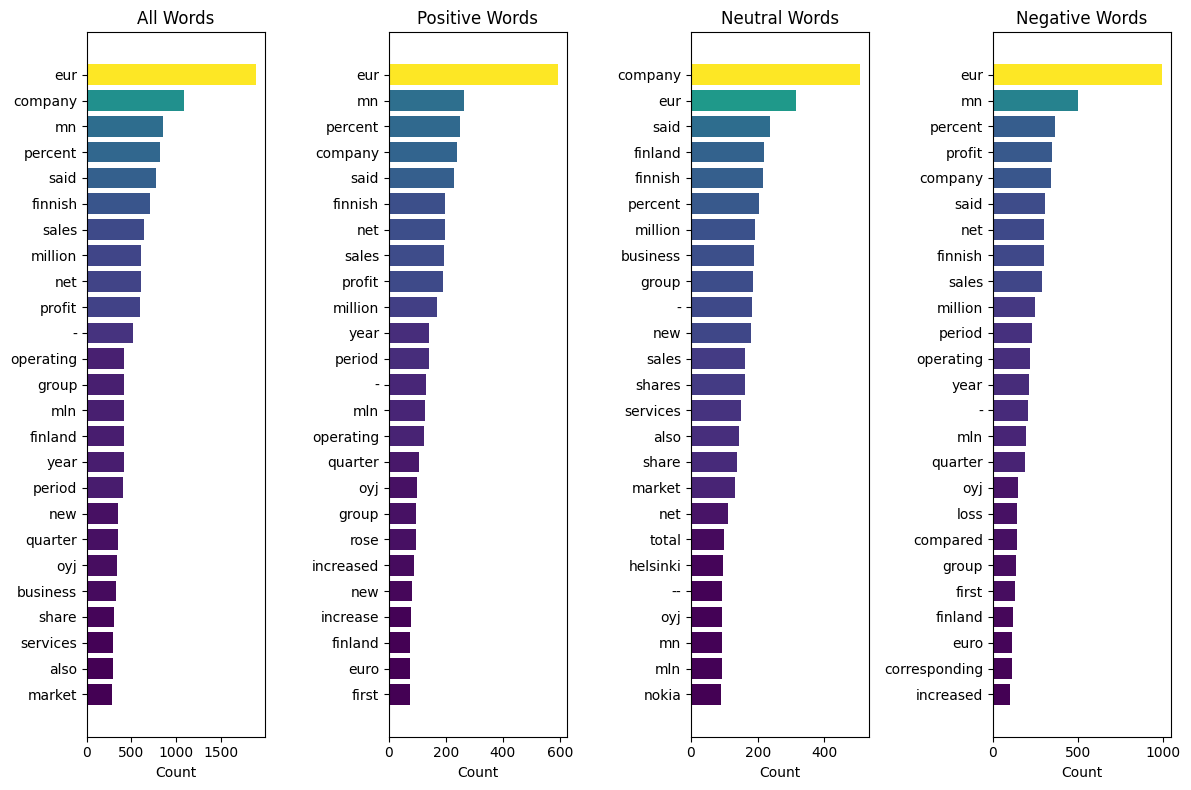

In [9]:
#bar chart frequency of words

def plot_word_frequency(all_words, pos_words, neu_words, neg_words, top=20):
    fig, axes = plt.subplots(1, 4, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.6) 

    categories = ['All Words', 'Positive Words', 'Neutral Words', 'Negative Words']
    data = [all_words, pos_words, neu_words, neg_words]

    for i, ax in enumerate(axes.flatten()):
        word_counts = Counter(data[i])
        labels, values = zip(*word_counts.items())
        sorted_indices = np.argsort(values)[::-1]
        sorted_labels = np.array(labels)[sorted_indices][:top][::-1]  # Sort labels in inverted order
        sorted_values = np.array(values)[sorted_indices][:top][::-1]  # Sort values in inverted order
        color_map = plt.get_cmap('viridis')

        norm_values = (sorted_values - min(sorted_values)) / (max(sorted_values) - min(sorted_values))

        ax.barh(range(len(sorted_labels)), sorted_values, color=color_map(norm_values))
        ax.set_yticks(range(len(sorted_labels)))
        ax.set_yticklabels(sorted_labels)
        ax.set_xlabel('Count')
        ax.set_title(categories[i])

    plt.tight_layout() 
    plt.show()



flattened_list_pos = [item for sublist in positives for item in sublist]
flattened_list_neu = [item for sublist in neutrals for item in sublist]
flattened_list_neg = [item for sublist in negatives for item in sublist]
flattened_list_all = flattened_list_pos + flattened_list_neu + flattened_list_neg
plot_word_frequency(flattened_list_all, flattened_list_pos, flattened_list_neu, flattened_list_neg, top=25)


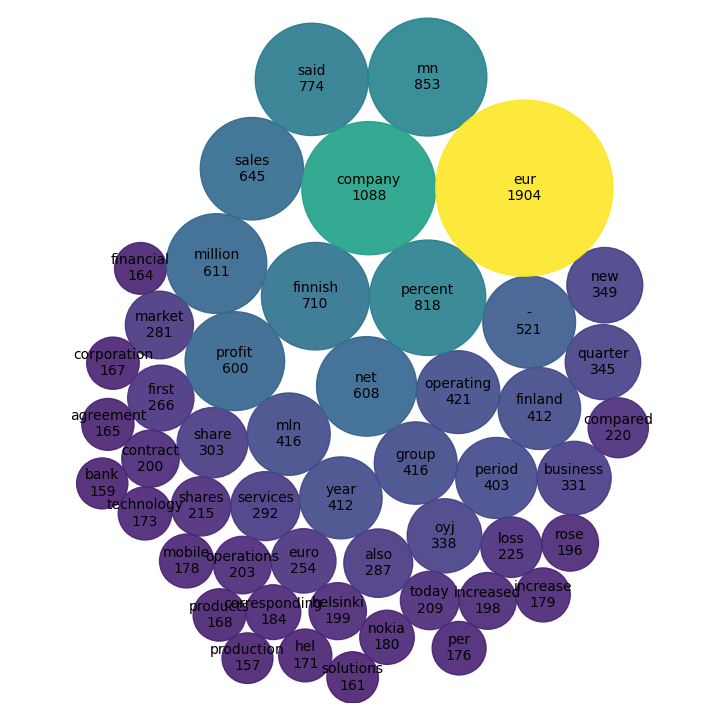

In [10]:
def plot_word_frequency_circles(words, top=20):
    # We sort the word counts in descending order
    word_counts = Counter(words)
    sorted_counts = sorted(word_counts.values(), reverse=True)
    sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)

    #Create the circles
    circles = circlify.circlify(sorted_counts[:top], show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0))
    n = sorted_counts[0]

    # Plot the circles we have created
    fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')
    ax.axis('off')
    lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)


    labels = sorted_words[:top]
    counts = sorted_counts[:top]
    labels.reverse()
    counts.reverse()

    color_map = plt.get_cmap('viridis')

    # Plot the circles
    for circle, label, count in zip(circles, labels, counts):
        x, y, r = circle
        color = color_map(count / n)
        ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color=color))
        plt.annotate(label + '\n' + str(count), (x, y), size=10, va='center', ha='center')

    plt.xticks([])
    plt.yticks([])
    plt.show()


plot_word_frequency_circles(flattened_list_all, top=50)

# Task3:  Text classification

### Naive Bayes Model

In [11]:
case_overview = {}
def run_and_evaluate(dataset, case_number, model, vectorizer, remove_numbers=False, remove_sw=False, stem_and_lemmatize=False, title=""):
    data, labels = extract_data(dataset)
    data_case, labels = data_preprocessing(data, labels, remove_numbers=remove_numbers, remove_sw=remove_sw, stem_and_lemmatize=stem_and_lemmatize)
   
    accuracy_score, f1, classification_report, confusion_matrix = train_classifier(model, vectorizer, data_case, labels) 

    print(f"Accuracy Score Case {case_number}: {accuracy_score}, F1 Score: {f1}")
    print(f"Classification Report Case {case_number}: \n{classification_report}")
    print(f"Confusion Matrix Case {case_number}: \n")

    case_overview[case_number] = {'accuracy_score': accuracy_score, 'f1': f1, 'classification_report': classification_report, 'confusion_matrix': confusion_matrix}
    
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [4, 4]  # Adjust the figure size as desired
       
    confusion_matrix.plot()
    confusion_matrix.ax_.set_title(label=title, fontsize=10)
    
    plt.show()


#### Case 1: Naive Bayes model with CountVectorizer & un-cleaned text


Accuracy Score Case 1: 75.15463917525773, F1 Score: 0.7419161719081354
Classification Report Case 1: 
              precision    recall  f1-score   support

    negative       0.68      0.57      0.62       110
     neutral       0.78      0.89      0.83       571
    positive       0.71      0.54      0.61       289

    accuracy                           0.75       970
   macro avg       0.72      0.67      0.69       970
weighted avg       0.75      0.75      0.74       970

Confusion Matrix Case 1: 



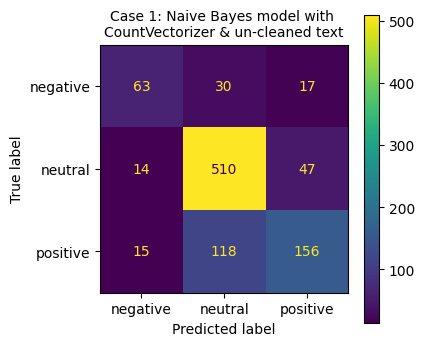

In [12]:
run_and_evaluate('data/Sentences_50Agree.txt', 1, MultinomialNB(), CountVectorizer(),remove_numbers=False, remove_sw=False, stem_and_lemmatize=False, title="Case 1: Naive Bayes model with \nCountVectorizer & un-cleaned text")

#### Case 2: Naive Bayes model with CountVectorizer & numbers removed

Accuracy Score Case 2: 75.25773195876289, F1 Score: 0.7431285999303742
Classification Report Case 2: 
              precision    recall  f1-score   support

    negative       0.80      0.54      0.64       110
     neutral       0.77      0.89      0.83       571
    positive       0.69      0.56      0.62       289

    accuracy                           0.75       970
   macro avg       0.75      0.66      0.69       970
weighted avg       0.75      0.75      0.74       970

Confusion Matrix Case 2: 



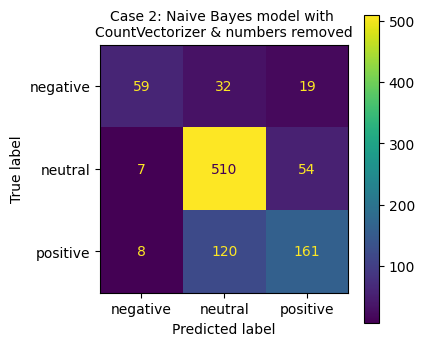

In [13]:
run_and_evaluate('data/Sentences_50Agree.txt', 2, MultinomialNB(), CountVectorizer(),remove_numbers=True, remove_sw=False, stem_and_lemmatize=False, title="Case 2: Naive Bayes model with \nCountVectorizer & numbers removed")

#### Case 3: Naive Bayes model with CountVectorizer & cleaned data

Accuracy Score Case 3: 71.75257731958763, F1 Score: 0.7083109022522152
Classification Report Case 3: 
              precision    recall  f1-score   support

    negative       0.64      0.55      0.60       110
     neutral       0.76      0.86      0.81       571
    positive       0.63      0.50      0.56       289

    accuracy                           0.72       970
   macro avg       0.68      0.64      0.65       970
weighted avg       0.71      0.72      0.71       970

Confusion Matrix Case 3: 



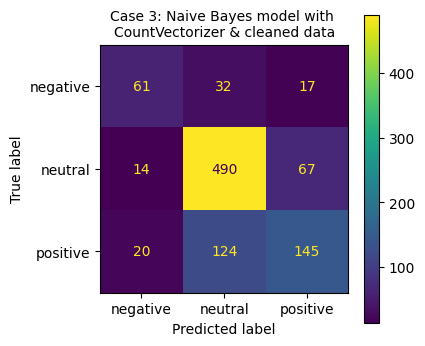

In [14]:
run_and_evaluate('data/Sentences_50Agree.txt', 3, MultinomialNB(), CountVectorizer(),remove_numbers=True, remove_sw=True, stem_and_lemmatize=True, title="Case 3: Naive Bayes model with \nCountVectorizer & cleaned data")

#### Case 4: Naive Bayes model with TF-IDF & un-cleaned text

Accuracy Score Case 4: 67.21649484536083, F1 Score: 0.5969776948590562
Classification Report Case 4: 
              precision    recall  f1-score   support

    negative       1.00      0.04      0.07       110
     neutral       0.67      0.99      0.80       571
    positive       0.69      0.28      0.40       289

    accuracy                           0.67       970
   macro avg       0.79      0.44      0.42       970
weighted avg       0.71      0.67      0.60       970

Confusion Matrix Case 4: 



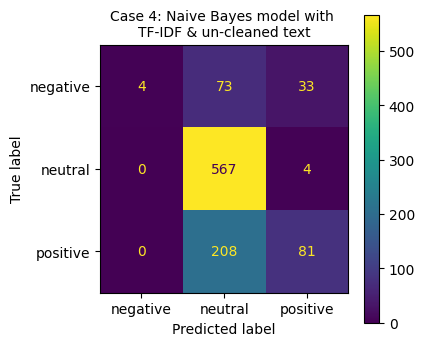

In [16]:
run_and_evaluate('data/Sentences_50Agree.txt', 4, MultinomialNB(), TfidfVectorizer(),remove_numbers=False, remove_sw=False, stem_and_lemmatize=False, title="Case 4: Naive Bayes model with \nTF-IDF & un-cleaned text")

#### Case 5: Naive Bayes model with TF-IDF & numbers remvoed

Accuracy Score Case 5: 68.45360824742268, F1 Score: 0.61960052864784
Classification Report Case 5: 
              precision    recall  f1-score   support

    negative       1.00      0.08      0.15       110
     neutral       0.68      0.99      0.81       571
    positive       0.69      0.31      0.43       289

    accuracy                           0.68       970
   macro avg       0.79      0.46      0.46       970
weighted avg       0.72      0.68      0.62       970

Confusion Matrix Case 5: 



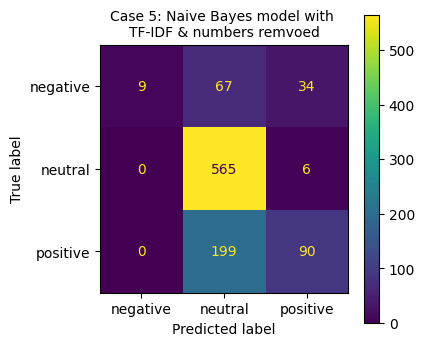

In [17]:
run_and_evaluate('data/Sentences_50Agree.txt', 5, MultinomialNB(), TfidfVectorizer(),remove_numbers=True, remove_sw=False, stem_and_lemmatize=False, title="Case 5: Naive Bayes model with \nTF-IDF & numbers remvoed")

#### Case 6: Naive Bayes model with TF-IDF & cleaned text

Accuracy Score Case 6: 68.76288659793815, F1 Score: 0.6282458624204456
Classification Report Case 6: 
              precision    recall  f1-score   support

    negative       1.00      0.08      0.15       110
     neutral       0.69      0.98      0.81       571
    positive       0.67      0.35      0.46       289

    accuracy                           0.69       970
   macro avg       0.78      0.47      0.47       970
weighted avg       0.72      0.69      0.63       970

Confusion Matrix Case 6: 



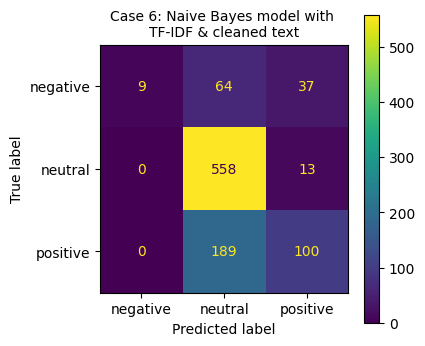

In [18]:
run_and_evaluate('data/Sentences_50Agree.txt', 6, MultinomialNB(), TfidfVectorizer(),remove_numbers=True, remove_sw=True, stem_and_lemmatize=True, title="Case 6: Naive Bayes model with \nTF-IDF & cleaned text")

##### Case Overview:

In [ ]:
for case in case_overview:
    print(f"Case {case}: Accuracy: {case_overview[case]['accuracy_score']}, F1: {case_overview[case]['f1']}")

Case 1: Accuracy: 75.15463917525773, F1: 0.7419161719081354
Case 2: Accuracy: 75.25773195876289, F1: 0.7431285999303742
Case 3: Accuracy: 71.75257731958763, F1: 0.7083109022522152
Case 4: Accuracy: 67.21649484536083, F1: 0.5969776948590562
Case 5: Accuracy: 68.45360824742268, F1: 0.61960052864784
Case 6: Accuracy: 68.76288659793815, F1: 0.6282458624204456


### Class Imbalance - Oversample Minority Class

During the initial training phase, we overlooked the importance of accounting for class imbalance, which resulted in a skewed distribution of data. Specifically, the 'Neutral' class consistently achieved high f1-scores, while the f1-scores for 'Negative' and 'Positive' were comparatively lower. This disparity undermines the performance and reliability of our model.

In order to rectify this issue, we will prioritize balancing the dataset. By ensuring an equal representation of instances across all classes, we aim to create a more accurate and robust model. This adjustment will enable the model to learn from a diverse range of examples and provide balanced predictions for each class.

In [22]:
#Data Preprocessing - We will use clean data
data, labels = extract_data('data/Sentences_50Agree.txt')
data_imbalanced, labels_imbalanced = data_preprocessing(data, labels, remove_numbers=True, remove_sw=True, stem_and_lemmatize=True)

In [23]:
# Convert Sentences into Vectors using TF-IDF
vectorizer = TfidfVectorizer()
data_imbalanced_vectorized = vectorizer.fit_transform(data_imbalanced).toarray() # Convert to array to be able to use SMOTE


# Fit LabelEncoder on original labels and encode labels
label_encoder = LabelEncoder()                                  # Convert labels to numbers
labels_encoded = label_encoder.fit_transform(labels_imbalanced) 

# Apply SMOTE oversampling to the vectorized data
smote = SMOTE(sampling_strategy='auto', random_state=28)            #Use 'auto' for equal number of samples for each class
data_resampled, labels_resampled = smote.fit_resample(data_imbalanced_vectorized, labels_encoded)


labels_resampled_original = label_encoder.inverse_transform(labels_resampled) # Convert labels back to it's original form
print(f"Original dataset: {len(labels_resampled_original)}, total labels of negative class: {len(labels_resampled_original[labels_resampled_original == 'negative'])}, total labels of positive class: {len(labels_resampled_original[labels_resampled_original == 'neutral'])}, total labels of neutral class: {len(labels_resampled_original[labels_resampled_original == 'positive'])}")


Original dataset: 8637, total labels of negative class: 2879, total labels of positive class: 2879, total labels of neutral class: 2879


Accuracy Score: 77.43055555555556, F1 Score: 0.7698662838037906
              precision    recall  f1-score   support

    negative       0.74      0.96      0.83       564
     neutral       0.84      0.70      0.76       580
    positive       0.77      0.67      0.72       584

    accuracy                           0.77      1728
   macro avg       0.78      0.78      0.77      1728
weighted avg       0.78      0.77      0.77      1728



Text(0.5, 1.0, 'Class Imbalance Oversample \nMinority Class (naives_bayes_model)')

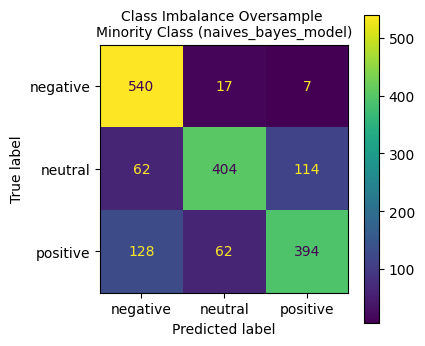

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_resampled, labels_resampled_original, test_size=0.2, shuffle=True,random_state=42)

naives_bayes_model = MultinomialNB()
naives_bayes_model.fit(X_train, y_train)

accuracy_score = naives_bayes_model.score(X_test, y_test) * 100
y_pred = naives_bayes_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy Score: {accuracy_score}, F1 Score: {f1}")
print(classification_report(y_test, y_pred))

%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 4]  # Adjust the figure size as desired
cm = Confusion_Matrix(y_test, y_pred)
cm.plot()
cm.ax_.set_title(label="Class Imbalance Oversample \nMinority Class (naives_bayes_model)", fontsize=10)


We observed that our model's accuracy and F1-scores have improved significantly after addressing the class imbalance and resampling the dataset. This enhancement is particularly noteworthy when comparing the performance to the previous experiment involving a Naive Bayes model trained on a clean dataset.

Previously, even with a clean dataset, our model failed to achieve an F1-score within the desired range of 0.61 - 0.62. However, after implementing data resampling techniques to create an equal distribution of 'positive,' 'neutral,' and 'negative' instances, we have witnessed a remarkable improvement in the model's F1-scores.

Notably, the F1-scores of each class have experienced substantial growth, indicating a more balanced and reliable prediction capability across all sentiment categories. In the earlier results, the F1-score for the 'Neutral' class significantly outperformed the other classes, indicating a bias in the model's performance. However, with the recent adjustments made to address class imbalance, we have successfully mitigated this issue, resulting in improved F1-scores for all sentiment classes.

Accuracy Score: 90.74074074074075, F1 Score: 0.907210631681977
              precision    recall  f1-score   support

    negative       0.95      0.96      0.95       564
     neutral       0.84      0.94      0.89       580
    positive       0.95      0.82      0.88       584

    accuracy                           0.91      1728
   macro avg       0.91      0.91      0.91      1728
weighted avg       0.91      0.91      0.91      1728



Text(0.5, 1.0, 'Class Imbalance Oversample \nMinority Class (RandomForest)')

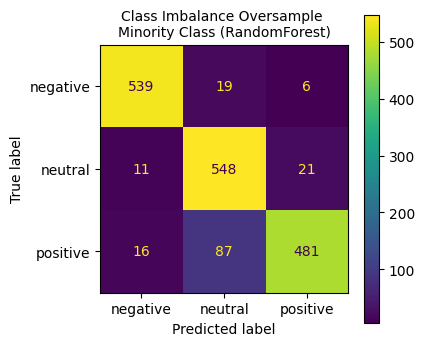

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_resampled, labels_resampled_original, test_size=0.2, shuffle=True,random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=42)
random_forest.fit(X_train, y_train)

accuracy_score = random_forest.score(X_test, y_test) * 100
y_pred = random_forest.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy Score: {accuracy_score}, F1 Score: {f1}")
print(classification_report(y_test, y_pred))

%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 4]  # Adjust the figure size as desired
cm = Confusion_Matrix(y_test, y_pred)
cm.plot()
cm.ax_.set_title(label="Class Imbalance Oversample \nMinority Class (RandomForest)", fontsize=10)

Accuracy Score: 79.45601851851852, F1 Score: 0.7942248731059732
              precision    recall  f1-score   support

    negative       0.89      0.86      0.88       564
     neutral       0.72      0.84      0.78       580
    positive       0.78      0.69      0.73       584

    accuracy                           0.79      1728
   macro avg       0.80      0.80      0.80      1728
weighted avg       0.80      0.79      0.79      1728



Text(0.5, 1.0, 'Class Imbalance Oversample \nMinority Class (AdaBoostClassifier)')

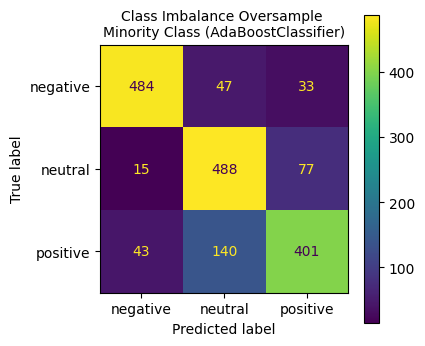

In [31]:
#Adaptative Boosting Model (AdaBoost)

X_train, X_test, y_train, y_test = train_test_split(data_resampled, labels_resampled_original, test_size=0.2, shuffle=True,random_state=42)

ada_boost = AdaBoostClassifier(n_estimators=100, learning_rate=1)
ada_boost.fit(X_train, y_train)

accuracy_score = ada_boost.score(X_test, y_test) * 100
y_pred = ada_boost.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy Score: {accuracy_score}, F1 Score: {f1}")
print(classification_report(y_test, y_pred))

%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 4]  # Adjust the figure size as desired
cm = Confusion_Matrix(y_test, y_pred)
cm.plot()
cm.ax_.set_title(label="Class Imbalance Oversample \nMinority Class (AdaBoostClassifier)", fontsize=10)


After conducting further experiments, we decided to train our model using the Random Forest classifier. The results indicate a significant improvement in the model's performance, reinforcing the notion that the choice of the model plays a crucial role in determining accuracy.

### Feed-forward neural network

In [ ]:
def ff_naural_net_preprocessing(vectorizer, label_encoder, remove_numbers=False, remove_sw=False, stem_and_lemmatize=False, binary_classification=False):
    #Preprocessing for FFN

    data, labels = extract_data('data/Sentences_50Agree.txt') #Extract data from file

    #If binary classification, remove neutral labels
    if binary_classification:
        dataset = pd.DataFrame(np.column_stack([data, labels]), 
                               columns=['data', 'labels'])
        dataset = dataset.drop(dataset[dataset['labels'] == 'neutral'].index)

        data, labels = [], []
        for index, row in dataset.iterrows():
            data.append(row['data'])
            labels.append(row['labels'])



    data_FFN, labels_FFN= data_preprocessing(data, labels, remove_numbers=remove_numbers, remove_sw=remove_sw, stem_and_lemmatize=stem_and_lemmatize)


    #Convert Sentences into Vectors using TF-IDF
    data_FNN_vectorized = vectorizer.fit_transform(data_FFN)
    #print(vectorizer.vocabulary_)
    data_FNN_vectorized = data_FNN_vectorized.toarray()

    ## Convert labels into vectors
    labels_encoded = label_encoder.fit_transform(labels_FFN)
    print(f"Shape of Encoded Labels: {labels_encoded.shape}, Shape of Data: {data_FNN_vectorized.shape}")
    print(f"Distinct Label Classes: {set(labels_encoded)}\n")

    return data_FNN_vectorized, labels_encoded, label_encoder


cases_ff_net = {}

In [ ]:
print("Case 1: FFN with TfidfVectorizer & un-cleaned text")
data_FNN_vectorized, labels_encoded, label_encoder = ff_naural_net_preprocessing(TfidfVectorizer(), LabelEncoder() , remove_numbers=False, remove_sw=False, stem_and_lemmatize=False, binary_classification=False)
X_train, X_test, y_train, y_test = train_test_split(data_FNN_vectorized, labels_encoded, test_size=0.2, shuffle=True, random_state=42)
cases_ff_net[1]={"x_train":X_train, "x_test":X_test, "y_train":y_train, "y_test":y_test, "label_encoder":label_encoder}

print("Case 2: FFN with TfidfVectorizer & cleaned text")
data_FNN_vectorized, labels_encoded, label_encoder = ff_naural_net_preprocessing(TfidfVectorizer(), LabelEncoder() , remove_numbers=True, remove_sw=True, stem_and_lemmatize=True, binary_classification=False)
X_train, X_test, y_train, y_test = train_test_split(data_FNN_vectorized, labels_encoded, test_size=0.2, shuffle=True, random_state=42)
cases_ff_net[2]={"x_train":X_train, "x_test":X_test, "y_train":y_train, "y_test":y_test, "label_encoder":label_encoder}

print("Case 3: FFN with CountVectorizer & un-cleaned text")
data_FNN_vectorized, labels_encoded, label_encoder = ff_naural_net_preprocessing(CountVectorizer(), LabelEncoder() , remove_numbers=False, remove_sw=False, stem_and_lemmatize=False, binary_classification=False)
X_train, X_test, y_train, y_test = train_test_split(data_FNN_vectorized, labels_encoded, test_size=0.2, shuffle=True, random_state=42)
cases_ff_net[3]={"x_train":X_train, "x_test":X_test, "y_train":y_train, "y_test":y_test, "label_encoder":label_encoder}


print("Case 4: FFN with CountVectorizer & cleaned text")
data_FNN_vectorized, labels_encoded, label_encoder = ff_naural_net_preprocessing(CountVectorizer(), LabelEncoder() , remove_numbers=True, remove_sw=True, stem_and_lemmatize=True, binary_classification=False)
X_train, X_test, y_train, y_test = train_test_split(data_FNN_vectorized, labels_encoded, test_size=0.2, shuffle=True, random_state=42)
cases_ff_net[4]={"x_train":X_train, "x_test":X_test, "y_train":y_train, "y_test":y_test, "label_encoder":label_encoder}

print("Case 5: FFN with TfidfVectorizer & binary classification")
data_FNN_vectorized, labels_encoded, label_encoder = ff_naural_net_preprocessing(TfidfVectorizer(), LabelEncoder() , remove_numbers=True, remove_sw=True, stem_and_lemmatize=True, binary_classification=True)
X_train, X_test, y_train, y_test = train_test_split(data_FNN_vectorized, labels_encoded, test_size=0.2, shuffle=True, random_state=42)
cases_ff_net[5]={"x_train":X_train, "x_test":X_test, "y_train":y_train, "y_test":y_test, "label_encoder":label_encoder}


Case 1: FFN with TfidfVectorizer & un-cleaned text


Shape of Encoded Labels: (4846,), Shape of Data: (4846, 9556)
Distinct Label Classes: {0, 1, 2}

Case 2: FFN with TfidfVectorizer & cleaned text
Shape of Encoded Labels: (4846,), Shape of Data: (4846, 6859)
Distinct Label Classes: {0, 1, 2}

Case 3: FFN with CountVectorizer & un-cleaned text
Shape of Encoded Labels: (4846,), Shape of Data: (4846, 9556)
Distinct Label Classes: {0, 1, 2}

Case 4: FFN with CountVectorizer & cleaned text
Shape of Encoded Labels: (4846,), Shape of Data: (4846, 6859)
Distinct Label Classes: {0, 1, 2}

Case 5: FFN with TfidfVectorizer & binary classification
Shape of Encoded Labels: (1967,), Shape of Data: (1967, 3810)
Distinct Label Classes: {0, 1}



In [ ]:
#un-cleaned text (model_1) and cleaned_text (model_2) have different shapes
model_1 = Sequential([
    keras.layers.Input(shape=(cases_ff_net[1]["x_train"].shape[1],)), 
    keras.layers.Dense(10, activation='relu'),
    #keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
     
    
    ])

model_2 = Sequential([
    keras.layers.Input(shape=(cases_ff_net[2]["x_train"].shape[1],)), 
    keras.layers.Dense(10, activation='relu'),
    #keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
     
    
    ])
#Binary classification
model_3 = Sequential([
    keras.layers.Input(shape=(cases_ff_net[5]["x_train"].shape[1],)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')


])


model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )



model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                95570     
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 95,603
Trainable params: 95,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def analyze_results_model(model_results):
    train_loss = model_results.history['loss']
    val_loss = model_results.history['val_loss']
    train_accuracy = model_results.history['accuracy']
    val_accuracy = model_results.history['val_accuracy']


    epochs = range(1, len(train_loss) + 1)

    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot loss scores
    axs[0].plot(epochs, train_loss, 'g', label='Training Loss')
    axs[0].plot(epochs, val_loss, 'b', label='Validation Loss')
    axs[0].set_title('Loss Scores')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plot accuracy scores
    axs[1].plot(epochs, train_accuracy, 'c', label='Training Accuracy')
    axs[1].plot(epochs, val_accuracy, 'm', label='Validation Accuracy')
    axs[1].set_title('Accuracy Scores')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    # Show the plots
    plt.show()

In [ ]:
def draw_conf_matrix(model, label_encoder, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Decode the predicted classes
    predicted_labels = label_encoder.inverse_transform(y_pred_classes)

    # Decode the true classes
    true_labels = label_encoder.inverse_transform(y_test)

    # Generate the classification report
    report = classification_report(true_labels, predicted_labels)
    print(report)

    conf_matrix = Confusion_Matrix(true_labels, predicted_labels)    
    conf_matrix.plot()
    plt.show()

    # Show the plots
    plt.show()

Case 1: FFN with TfidfVectorizer & un-cleaned text
Epoch 1/20
49/49 [==============================] - 1s 10ms/step - loss: 1.0596 - accuracy: 0.5769 - val_loss: 1.0040 - val_accuracy: 0.5960
Epoch 2/20
49/49 [==============================] - 0s 6ms/step - loss: 0.9588 - accuracy: 0.5991 - val_loss: 0.9005 - val_accuracy: 0.6140
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.8608 - accuracy: 0.6282 - val_loss: 0.8054 - val_accuracy: 0.6447
Epoch 4/20
49/49 [==============================] - 0s 6ms/step - loss: 0.7735 - accuracy: 0.6566 - val_loss: 0.7216 - val_accuracy: 0.6770
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.6925 - val_loss: 0.6476 - val_accuracy: 0.7221
Epoch 6/20
49/49 [==============================] - 0s 6ms/step - loss: 0.6247 - accuracy: 0.7353 - val_loss: 0.5806 - val_accuracy: 0.7611
Epoch 7/20
49/49 [==============================] - 0s 6ms/step - loss: 0.5600 - accuracy: 0.7807 - val_loss

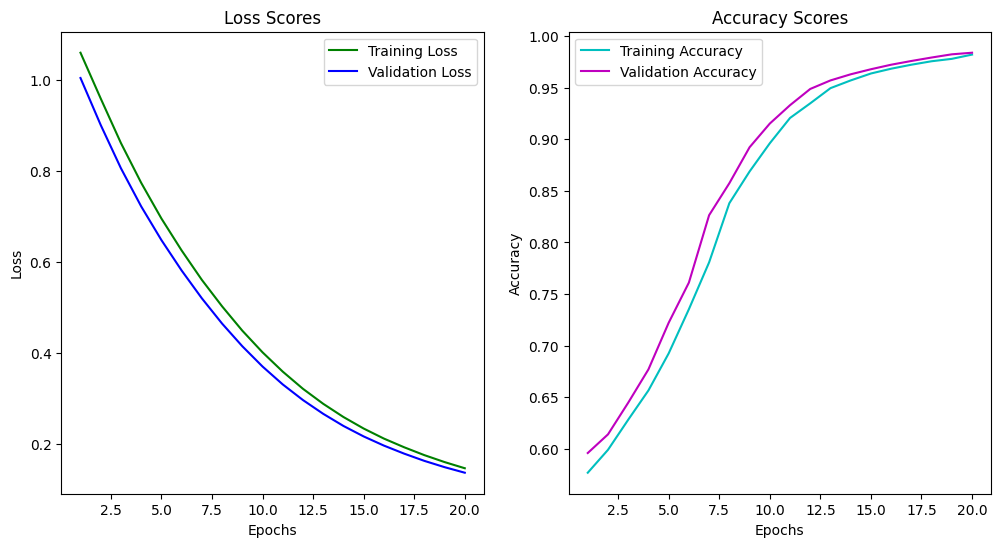

31/31 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       0.77      0.57      0.66       110
     neutral       0.77      0.90      0.83       571
    positive       0.73      0.55      0.62       289

    accuracy                           0.76       970
   macro avg       0.75      0.67      0.70       970
weighted avg       0.75      0.76      0.75       970



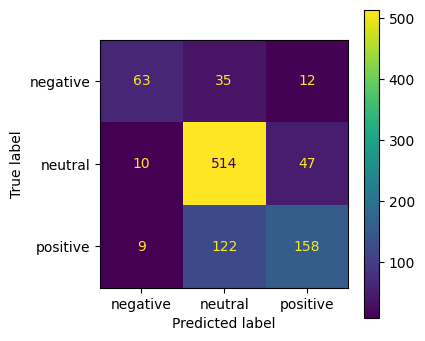

In [ ]:
print("Case 1: FFN with TfidfVectorizer & un-cleaned text")
X_train, y_train, X_test, y_test, label_encoder = cases_ff_net[1]["x_train"], cases_ff_net[1]["y_train"], cases_ff_net[1]["x_test"], cases_ff_net[1]["y_test"], cases_ff_net[1]["label_encoder"]
model_results = model_1.fit(X_train, y_train, epochs=20, batch_size=80, validation_data=(X_train, y_train)) 
analyze_results_model(model_results)
draw_conf_matrix(model_1, label_encoder, X_test, y_test)

Case 2: FFN with TfidfVectorizer & cleaned text


Epoch 1/20
49/49 [==============================] - 1s 8ms/step - loss: 1.0660 - accuracy: 0.5826 - val_loss: 1.0187 - val_accuracy: 0.6298
Epoch 2/20
49/49 [==============================] - 0s 6ms/step - loss: 0.9747 - accuracy: 0.6453 - val_loss: 0.9154 - val_accuracy: 0.6620
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.8727 - accuracy: 0.6631 - val_loss: 0.8131 - val_accuracy: 0.6718
Epoch 4/20
49/49 [==============================] - 0s 5ms/step - loss: 0.7781 - accuracy: 0.6793 - val_loss: 0.7250 - val_accuracy: 0.6922
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.7028 - val_loss: 0.6495 - val_accuracy: 0.7299
Epoch 6/20
49/49 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 0.7379 - val_loss: 0.5841 - val_accuracy: 0.7750
Epoch 7/20
49/49 [==============================] - 0s 5ms/step - loss: 0.5648 - accuracy: 0.7866 - val_loss: 0.5254 - val_accuracy: 0.8104
Epoch 8/20
49/49 [==

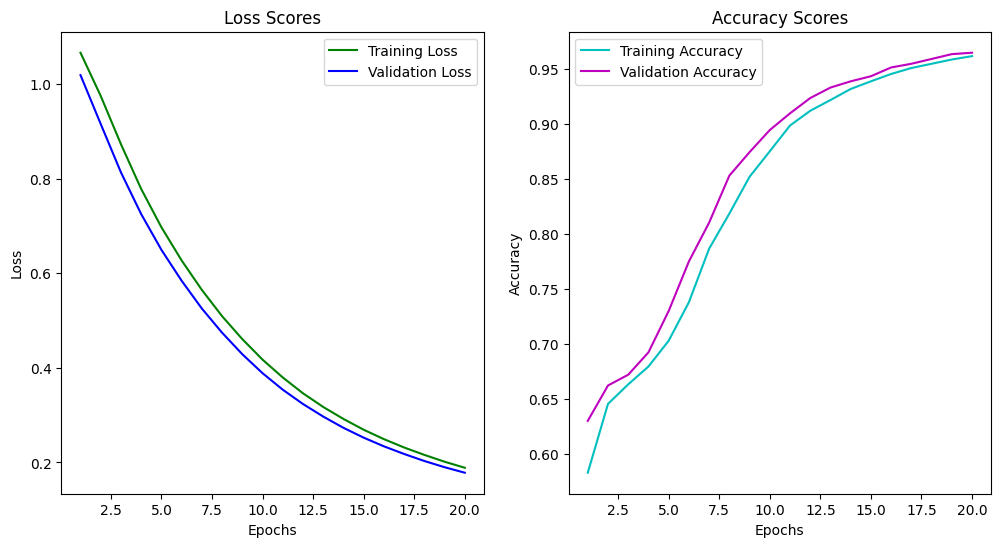

31/31 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       0.73      0.55      0.63       110
     neutral       0.76      0.87      0.81       571
    positive       0.67      0.53      0.59       289

    accuracy                           0.74       970
   macro avg       0.72      0.65      0.68       970
weighted avg       0.73      0.74      0.73       970



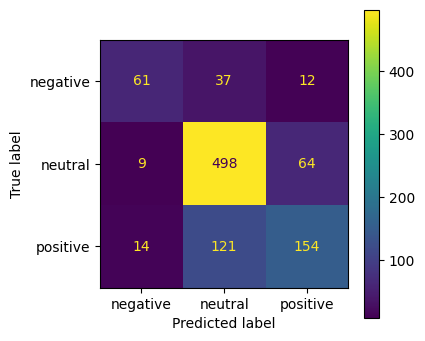

In [ ]:

print("Case 2: FFN with TfidfVectorizer & cleaned text")
X_train, y_train, X_test, y_test, label_encoder = cases_ff_net[2]["x_train"], cases_ff_net[2]["y_train"], cases_ff_net[2]["x_test"], cases_ff_net[2]["y_test"], cases_ff_net[2]["label_encoder"]
model_results = model_2.fit(X_train, y_train, epochs=20, batch_size=80, validation_data=(X_train, y_train)) 
analyze_results_model(model_results)
draw_conf_matrix(model_2, label_encoder, X_test, y_test)

Case 3: FFN with CountVectorizer & un-cleaned text
Epoch 1/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1546 - accuracy: 0.9523 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0614 - accuracy: 0.9814 - val_loss: 0.0439 - val_accuracy: 0.9876
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9886 - val_loss: 0.0285 - val_accuracy: 0.9917
Epoch 4/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0246 - val_accuracy: 0.9933
Epoch 5/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0206 - val_accuracy: 0.9938
Epoch 6/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0186 - val_accuracy: 0.9943
Epoch 7/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.9930 - val_loss

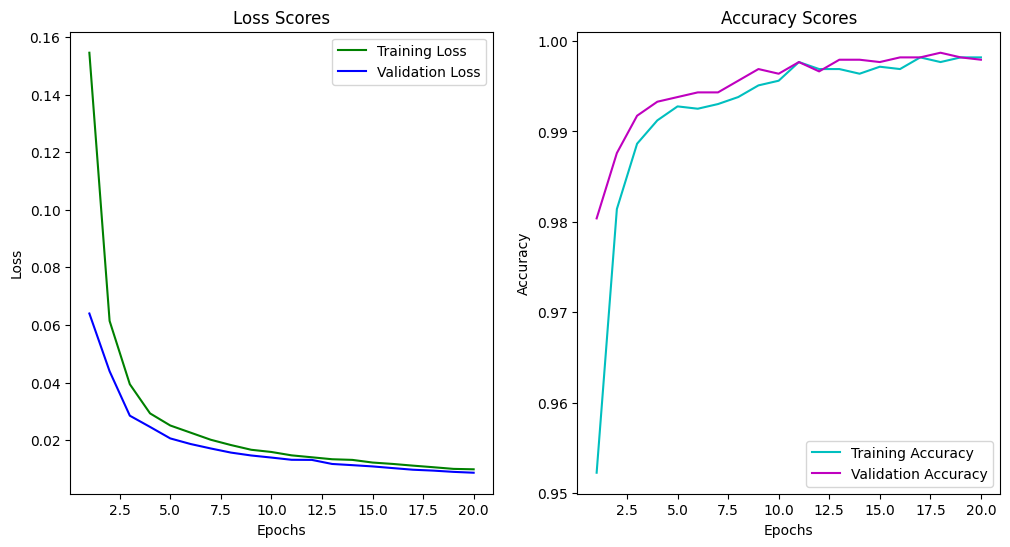

31/31 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    negative       0.68      0.59      0.63       110
     neutral       0.79      0.86      0.82       571
    positive       0.69      0.60      0.64       289

    accuracy                           0.75       970
   macro avg       0.72      0.68      0.70       970
weighted avg       0.75      0.75      0.75       970



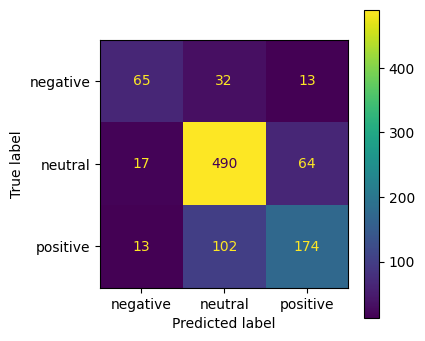

In [ ]:

print("Case 3: FFN with CountVectorizer & un-cleaned text")
X_train, y_train, X_test, y_test, label_encoder = cases_ff_net[3]["x_train"], cases_ff_net[3]["y_train"], cases_ff_net[3]["x_test"], cases_ff_net[3]["y_test"], cases_ff_net[3]["label_encoder"]
model_results = model_1.fit(X_train, y_train, epochs=20, batch_size=80, validation_data=(X_train, y_train)) 
analyze_results_model(model_results)
draw_conf_matrix(model_1, label_encoder, X_test, y_test)

Case 4: FFN with CountVectorizer & cleaned text
Epoch 1/20
49/49 [==============================] - 1s 10ms/step - loss: 0.1619 - accuracy: 0.9435 - val_loss: 0.0976 - val_accuracy: 0.9685
Epoch 2/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0968 - accuracy: 0.9701 - val_loss: 0.0763 - val_accuracy: 0.9763
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0783 - accuracy: 0.9757 - val_loss: 0.0663 - val_accuracy: 0.9781
Epoch 4/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0687 - accuracy: 0.9783 - val_loss: 0.0601 - val_accuracy: 0.9804
Epoch 5/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0619 - accuracy: 0.9788 - val_loss: 0.0550 - val_accuracy: 0.9814
Epoch 6/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0568 - accuracy: 0.9809 - val_loss: 0.0511 - val_accuracy: 0.9825
Epoch 7/20
49/49 [==============================] - 0s 7ms/step - loss: 0.0531 - accuracy: 0.9817 - val_loss: 0

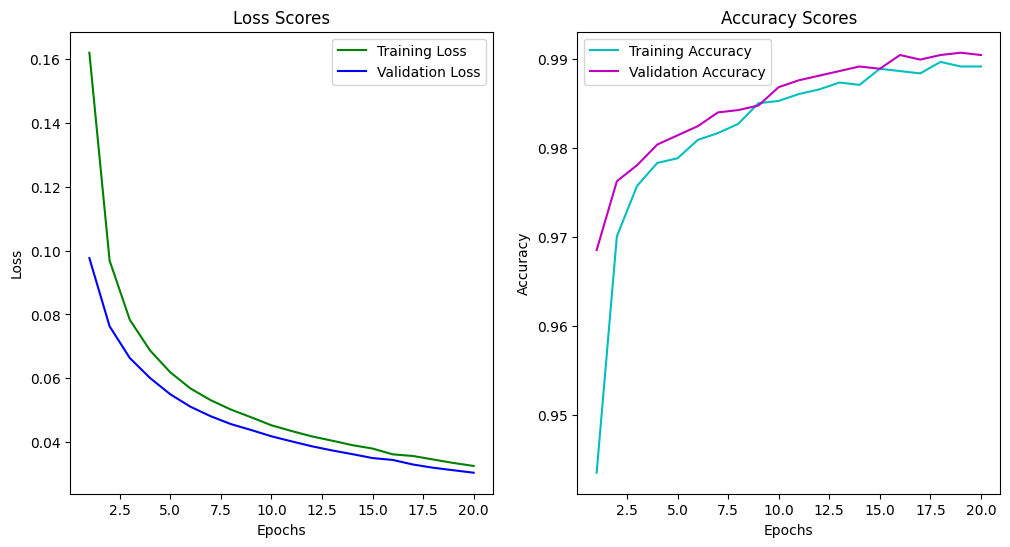

31/31 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    negative       0.66      0.55      0.60       110
     neutral       0.77      0.83      0.80       571
    positive       0.64      0.57      0.60       289

    accuracy                           0.72       970
   macro avg       0.69      0.65      0.67       970
weighted avg       0.72      0.72      0.72       970



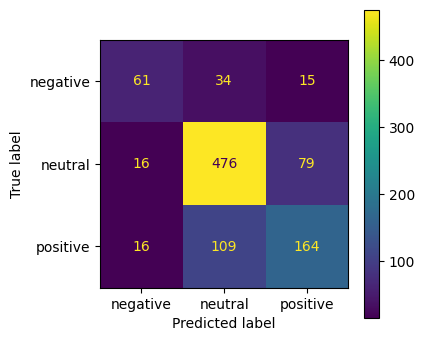

In [ ]:

print("Case 4: FFN with CountVectorizer & cleaned text")
X_train, y_train, X_test, y_test, label_encoder = cases_ff_net[4]["x_train"], cases_ff_net[4]["y_train"], cases_ff_net[4]["x_test"], cases_ff_net[4]["y_test"], cases_ff_net[4]["label_encoder"]
model_results = model_2.fit(X_train, y_train, epochs=20, batch_size=80, validation_data=(X_train, y_train)) 
analyze_results_model(model_results)
draw_conf_matrix(model_2, label_encoder, X_test, y_test)

The best case is case 1   (FFN with TfidfVectorizer & un-cleaned text)

We have observed that the performance of our model in predicting positive and negative labels is not satisfactory, even after utilizing Count Vectorizer as the word embedding technique. It is evident that the model struggles the most in predicting negative labels, followed by positive labels, while performing relatively better in predicting neutral classes. This observation is supported by the distribution of labels in our dataset, where neutral labels constitute 46.4% of the data, positive labels make up 31.7%, and negative labels are the least represented at only 22%.

The presence of class imbalance is a significant factor contributing to the model's subpar performance. When one class is underrepresented compared to others, the model tends to prioritize the majority class, resulting in biased predictions and poorer performance on the minority classes.

Case 5: FFN with CountVectorizer & Binary Classification (Negative and Positive Class)
Epoch 1/20
20/20 [==============================] - 0s 10ms/step - loss: 0.6835 - accuracy: 0.6542 - val_loss: 0.6681 - val_accuracy: 0.6993
Epoch 2/20
20/20 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6993 - val_loss: 0.6398 - val_accuracy: 0.6993
Epoch 3/20
20/20 [==============================] - 0s 6ms/step - loss: 0.6271 - accuracy: 0.7006 - val_loss: 0.6089 - val_accuracy: 0.7018
Epoch 4/20
20/20 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.7038 - val_loss: 0.5749 - val_accuracy: 0.7101
Epoch 5/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5601 - accuracy: 0.7228 - val_loss: 0.5375 - val_accuracy: 0.7406
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.7552 - val_loss: 0.4983 - val_accuracy: 0.7826
Epoch 7/20
20/20 [==============================] - 0s 5ms/step - loss: 

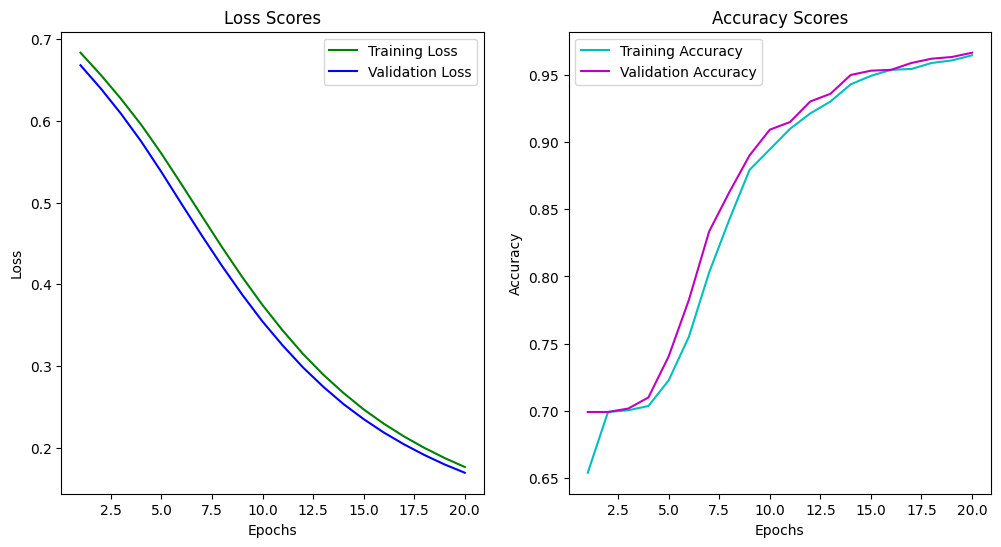

13/13 [==============================] - 0s 914us/step
              precision    recall  f1-score   support

    negative       0.85      0.63      0.72       131
    positive       0.84      0.95      0.89       263

    accuracy                           0.84       394
   macro avg       0.84      0.79      0.81       394
weighted avg       0.84      0.84      0.83       394



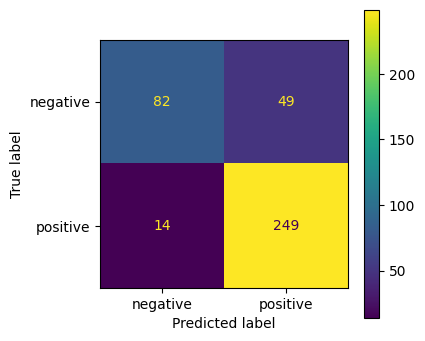

In [ ]:
print("Case 5: FFN with CountVectorizer & Binary Classification (Negative and Positive Class)")
X_train, y_train, X_test, y_test, label_encoder = cases_ff_net[5]["x_train"], cases_ff_net[5]["y_train"], cases_ff_net[5]["x_test"], cases_ff_net[5]["y_test"], cases_ff_net[5]["label_encoder"]
model_results = model_3.fit(X_train, y_train, epochs=20, batch_size=80, validation_data=(X_train, y_train)) 
analyze_results_model(model_results)
draw_conf_matrix(model_3, label_encoder, X_test, y_test)

We observed a significant improvement in our model's performance when we removed neutral labels from the dataset. However, it is worth noting that the positive class contains a higher number of labels compared to the negative class. As a result, we can observe that the f1_score of the positive class is higher than that of the negative class. To further enhance our results, we can take steps to balance both classes effectively. By addressing this class imbalance, we can strive for improved performance across all classes

# Task 4

In this task, you should choose 15 random negative instances, and compute the semantic textual
similarity between them. 
 - Please use the average of word vectors as a distributional semantics
approach at the sentence level to measure the similarity between messages.

 - Please report the cosine similarity between randomly selected sentences in your report. 
 
 - Please don’t use available packages to solve the task

In [ ]:
#Choose 15 random negative instances
data, labels = data_preprocessing(data,labels, remove_numbers=False, remove_sw=False, stem_and_lemmatize=False)
positives, neutrals, negatives = get_data_splitted(data, labels)
negative_15 = random.choices(negatives, k=15)

vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(negative_15)
count_array = count_matrix.toarray()


In [ ]:
#Cosine Similarity = (A.B) / (||A||.||B||) 

def dot(a1,a2):
    return sum(e1*e2 for e1, e2 in zip(a1, a2))

def length(a):
    return sqrt(dot(a, a))

def cos_sim(a1,a2):
    return dot(a1, a2) / (length(a1) * length(a2))

def calculate_cos_sim(elements):
    combinations = [[0] * len(elements) for _ in range(len(elements))]
    for i in range(len(elements)):
        for j in range(0, len(elements)):
            combinations[i][j]=cos_sim(elements[i], elements[j])
    
    return combinations


sim = calculate_cos_sim(count_array)
#We can create a dataframe to simplify the visualization
pd.DataFrame(sim)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.543350,0.113547,0.176950,0.347200,0.064923,0.312110,0.519519,0.249533,0.140449,0.294297,0.431056,0.243641,0.315637,0.281525
1,0.543350,1.000000,0.180151,0.070186,0.325509,0.051503,0.216645,0.580034,0.277133,0.185695,0.300167,0.297351,0.208145,0.275431,0.148888
2,0.113547,0.180151,1.000000,0.000000,0.098110,0.067267,0.080845,0.159490,0.155126,0.048507,0.217803,0.077674,0.116510,0.000000,0.064820
3,0.176950,0.070186,0.000000,1.000000,0.254824,0.052414,0.094491,0.093205,0.161165,0.113389,0.067884,0.030261,0.151307,0.152894,0.202031
4,0.347200,0.325509,0.098110,0.254824,1.000000,0.074796,0.224733,0.332513,0.373724,0.242712,0.242180,0.129550,0.259100,0.381818,0.324337
5,0.064923,0.051503,0.067267,0.052414,0.074796,1.000000,0.046225,0.091192,0.059131,0.000000,0.000000,0.310881,0.133235,0.000000,0.148250
6,0.312110,0.216645,0.080845,0.094491,0.224733,0.046225,1.000000,0.219199,0.248734,0.200000,0.269408,0.213504,0.240192,0.224733,0.178174
7,0.519519,0.580034,0.159490,0.093205,0.332513,0.091192,0.219199,1.000000,0.280400,0.098639,0.413377,0.421199,0.157949,0.288178,0.087875
8,0.249533,0.277133,0.155126,0.161165,0.373724,0.059131,0.248734,0.280400,1.000000,0.341121,0.268044,0.170697,0.238976,0.287480,0.284901
9,0.140449,0.185695,0.048507,0.113389,0.242712,0.000000,0.200000,0.098639,0.341121,1.000000,0.107763,0.128103,0.160128,0.323616,0.320713
